In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/diabetes_dataset.csv')
data.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [4]:
data.isna().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


On commence par vérifier le type de chaque variable ainsi que les valeurs manquantes. 
Nous allons procéder par remplacer les objects par des int.

In [5]:
data['smoking_status'].value_counts()

smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64

In [6]:
mappings = {}
data_cat = data.copy()

for col in data.columns:
    if data[col].dtype == 'object':
        cat_col = data[col].astype('category')
        mappings[col] = dict(enumerate(cat_col.cat.categories))
        data_cat[col] = cat_col.cat.codes
        
data_cat.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,1,0,1,2,0,2,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,4,1
1,48,0,4,1,3,0,1,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,1,0
2,60,1,2,1,3,3,2,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,4,1
3,74,0,1,1,1,1,2,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,4,1
4,46,1,4,0,3,1,2,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,4,1


In [7]:
mappings

{'gender': {0: 'Female', 1: 'Male', 2: 'Other'},
 'ethnicity': {0: 'Asian', 1: 'Black', 2: 'Hispanic', 3: 'Other', 4: 'White'},
 'education_level': {0: 'Graduate',
  1: 'Highschool',
  2: 'No formal',
  3: 'Postgraduate'},
 'income_level': {0: 'High',
  1: 'Low',
  2: 'Lower-Middle',
  3: 'Middle',
  4: 'Upper-Middle'},
 'employment_status': {0: 'Employed',
  1: 'Retired',
  2: 'Student',
  3: 'Unemployed'},
 'smoking_status': {0: 'Current', 1: 'Former', 2: 'Never'},
 'diabetes_stage': {0: 'Gestational',
  1: 'No Diabetes',
  2: 'Pre-Diabetes',
  3: 'Type 1',
  4: 'Type 2'}}

Cela va nous permettre d'intégrer ces valeurs par la suite dans nos modèles.


On print une vision un peu générale de la dataset

In [11]:
data_cat.describe()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,50.12041,0.517970,2.533270,1.00007,2.500500,0.698070,1.39637,2.003670,118.911640,5.994787,...,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,3.11133,0.599980
std,15.60460,0.538461,1.490126,1.00013,1.115371,1.024099,0.80174,1.417779,84.409662,1.780954,...,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,1.11717,0.489904
min,18.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.00000,0.000000
25%,39.00000,0.000000,1.000000,0.00000,2.000000,0.000000,1.00000,1.000000,57.000000,4.800000,...,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,2.00000,0.000000
50%,50.00000,0.000000,3.000000,1.00000,3.000000,0.000000,2.00000,2.000000,100.000000,6.000000,...,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,4.00000,1.000000
75%,61.00000,1.000000,4.000000,1.00000,3.000000,1.000000,2.00000,3.000000,160.000000,7.200000,...,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,4.00000,1.000000
max,90.00000,2.000000,4.000000,3.00000,4.000000,3.000000,2.00000,10.000000,833.000000,10.000000,...,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,4.00000,1.000000


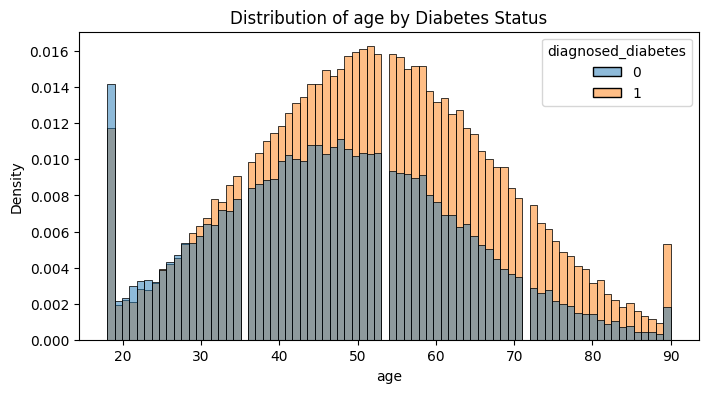

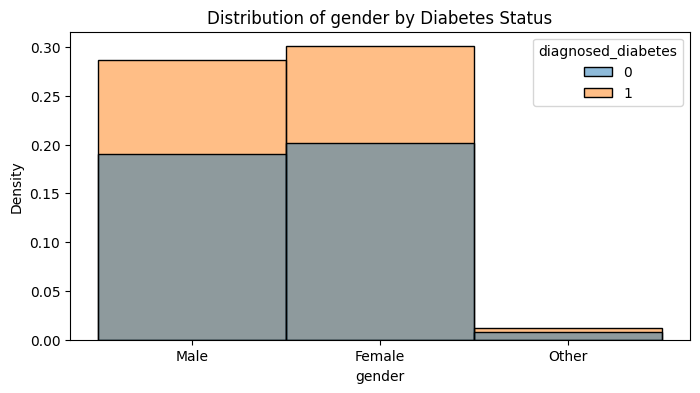

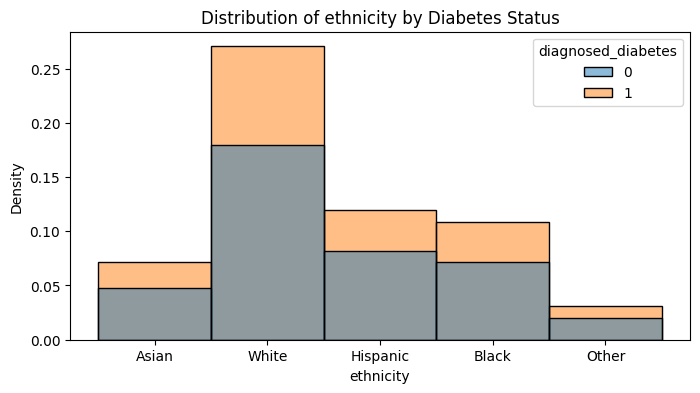

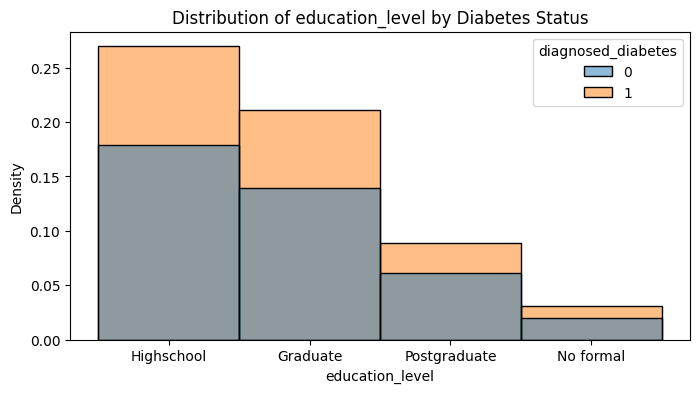

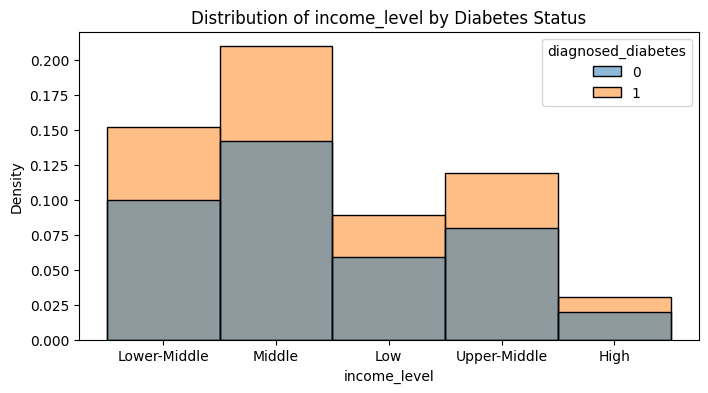

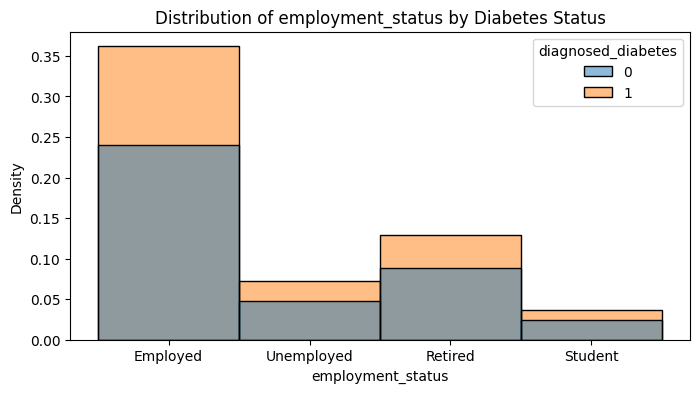

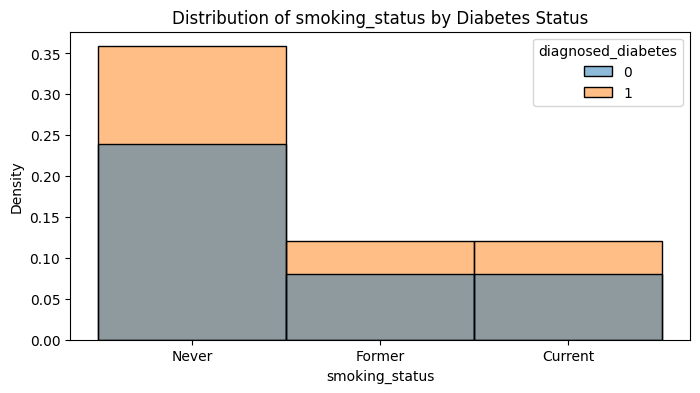

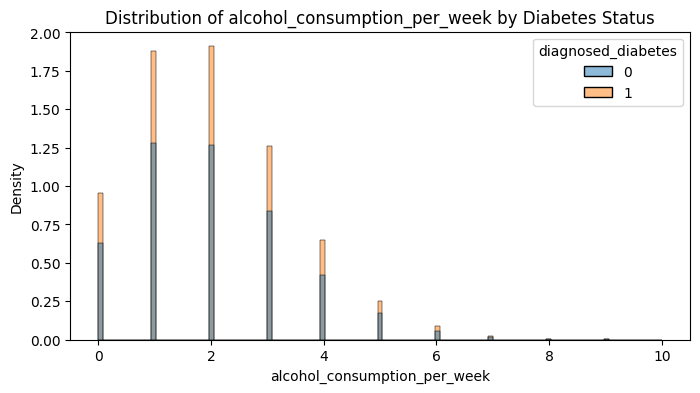

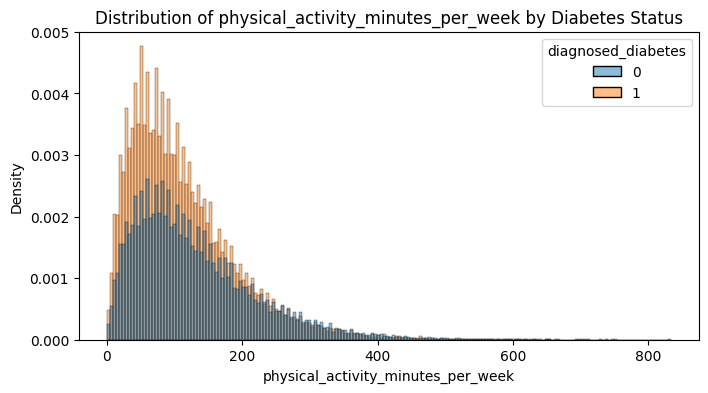

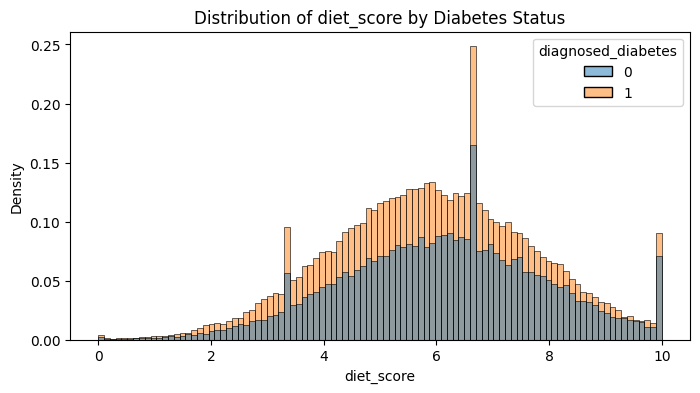

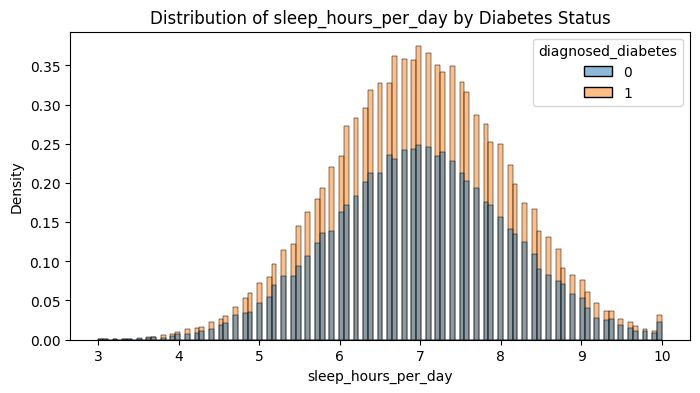

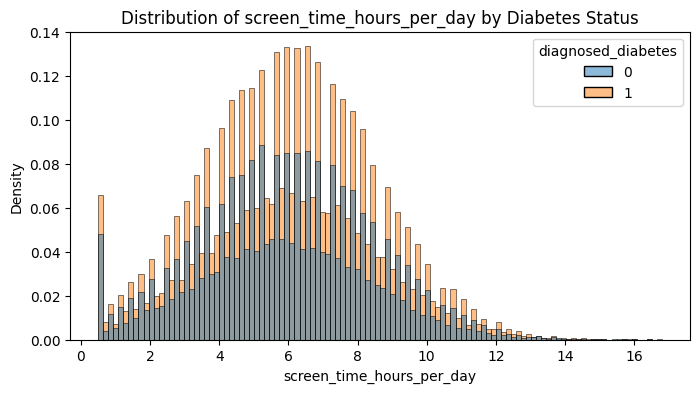

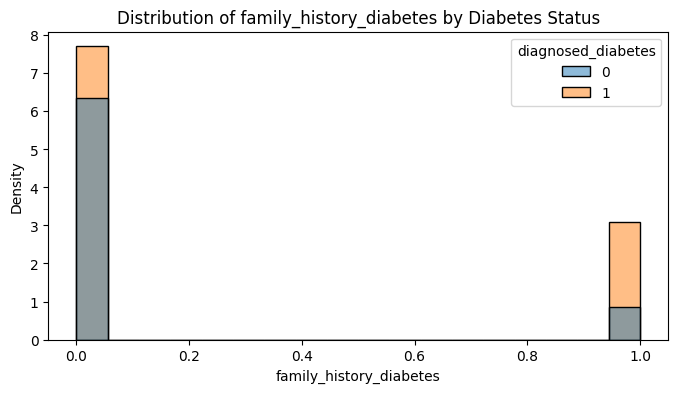

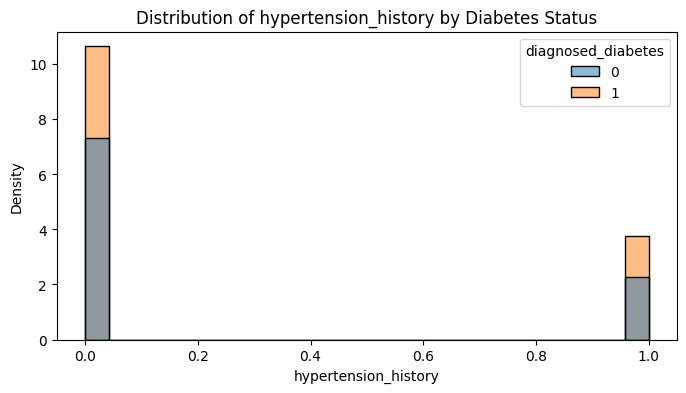

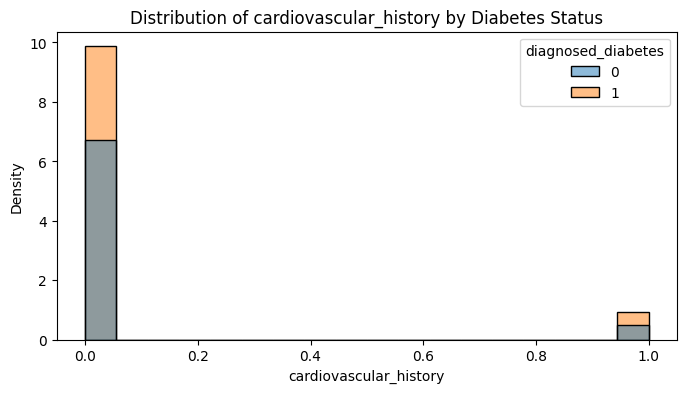

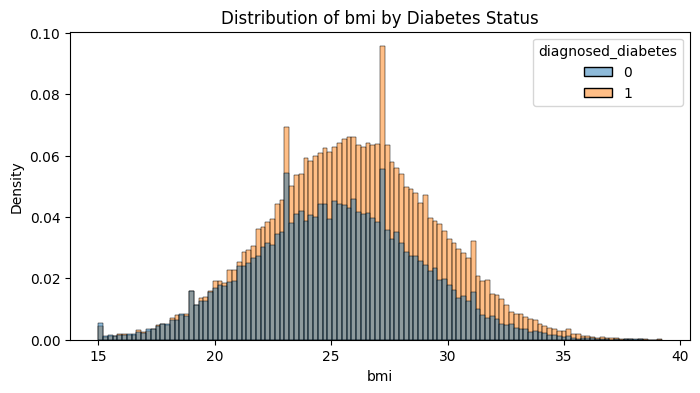

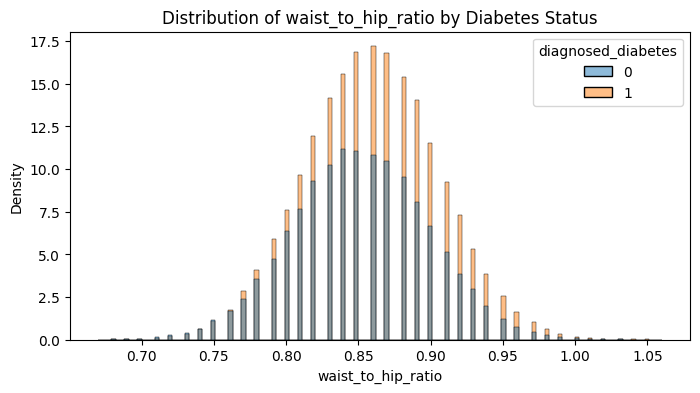

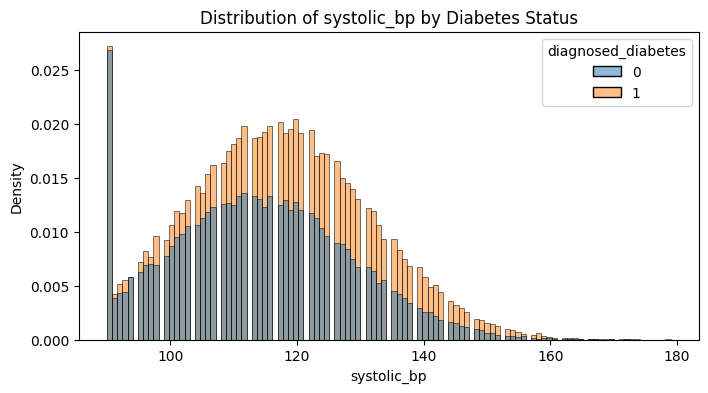

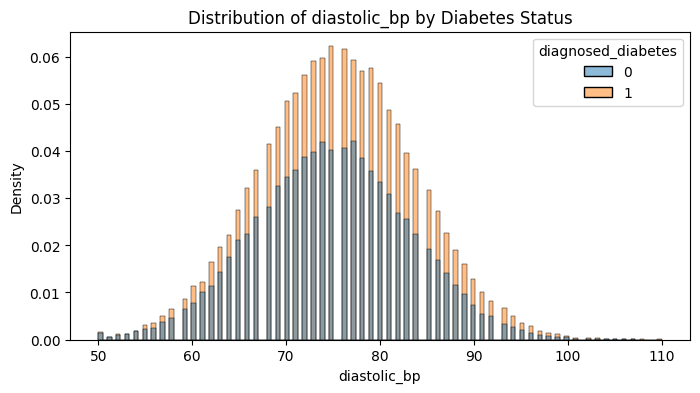

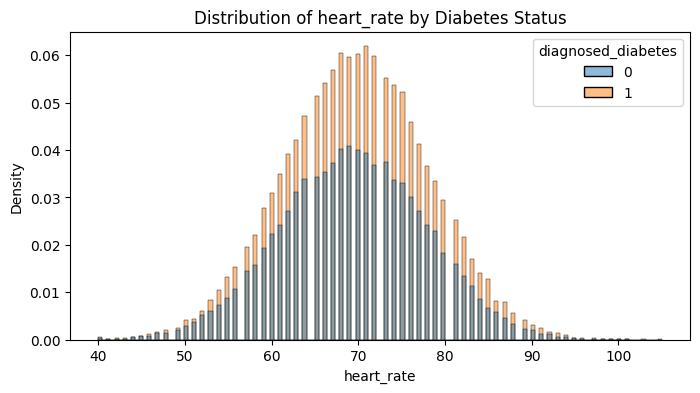

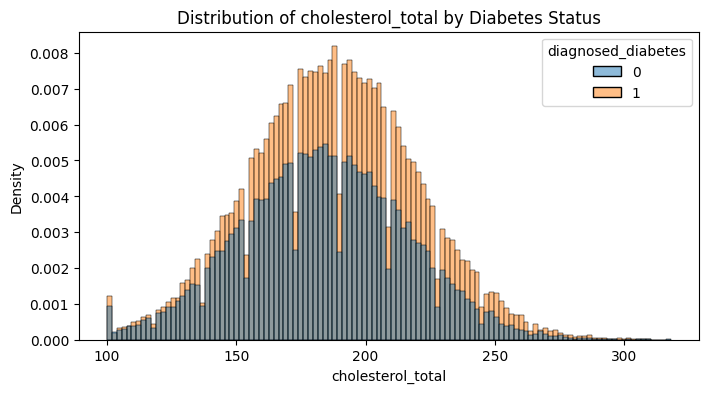

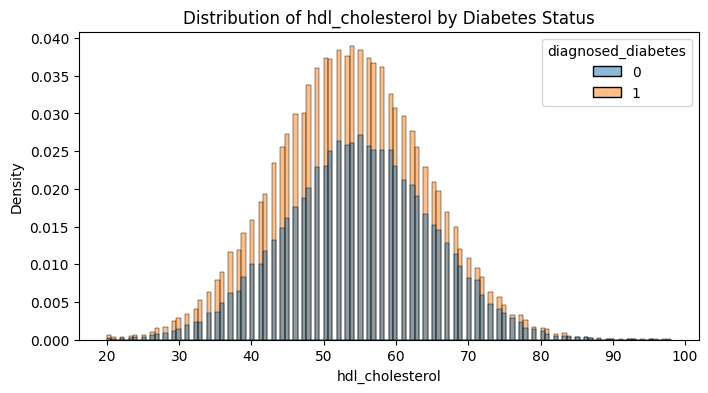

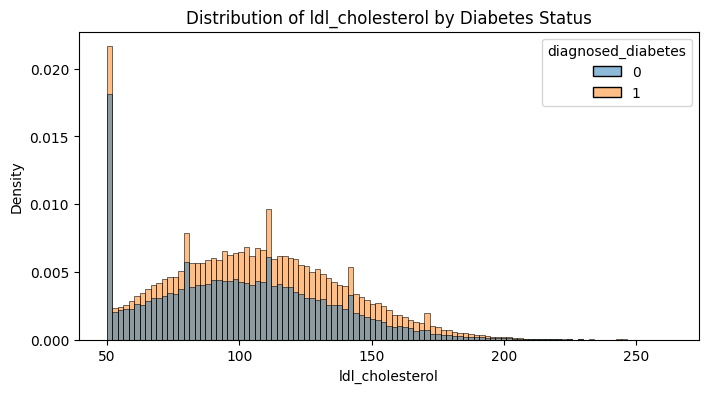

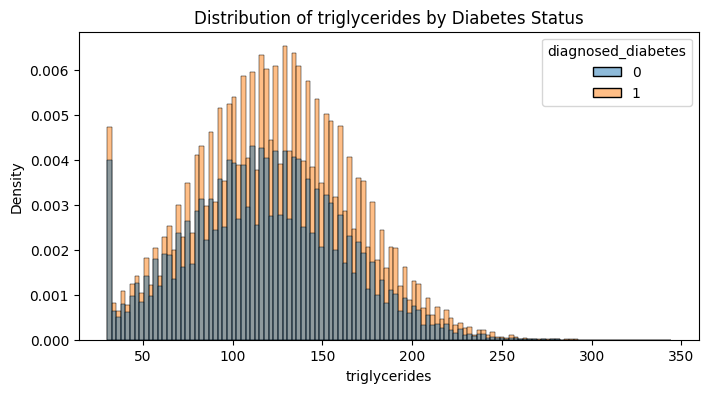

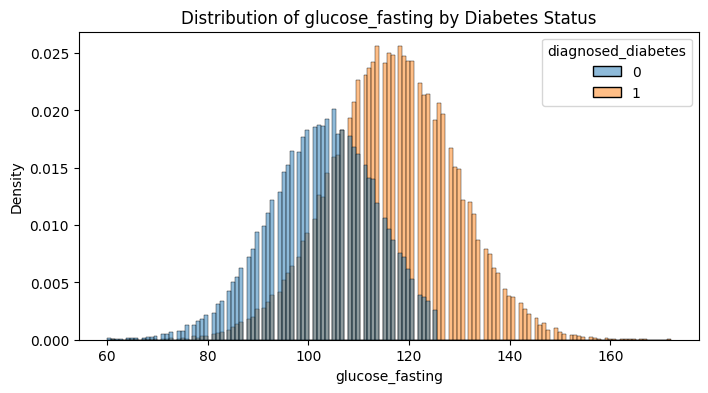

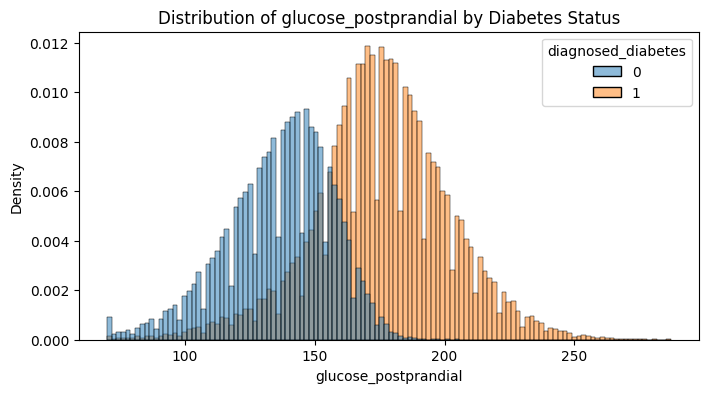

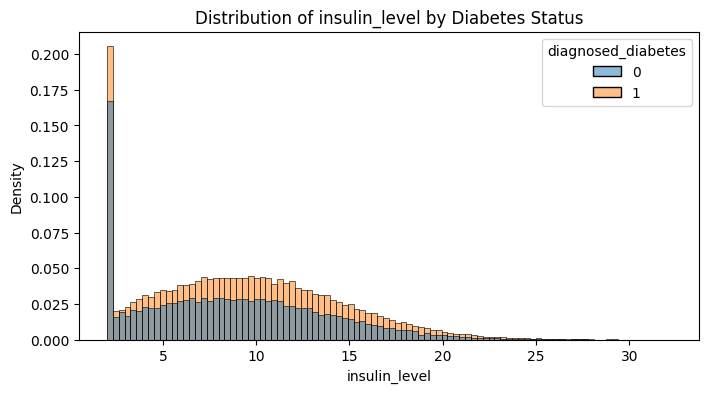

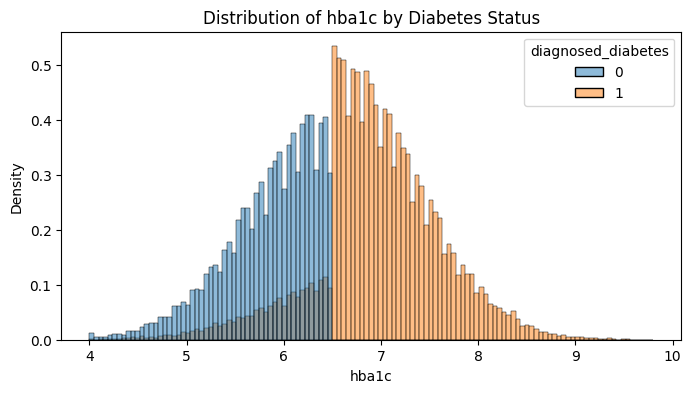

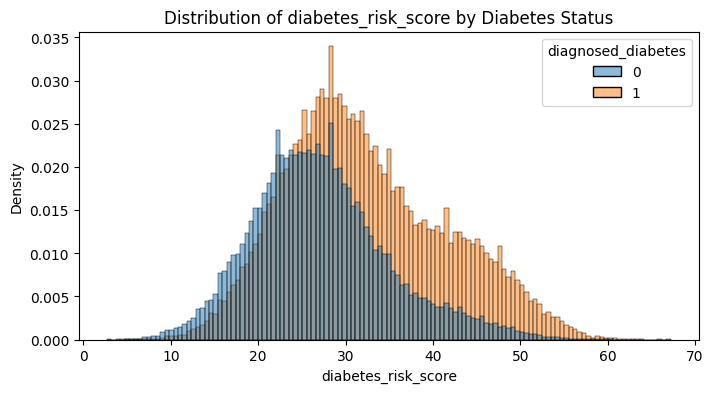

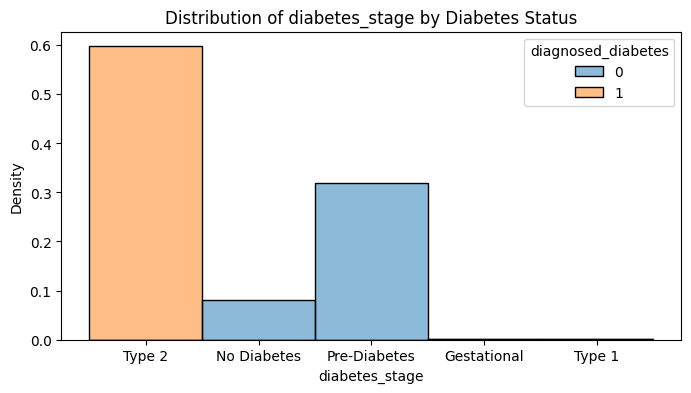

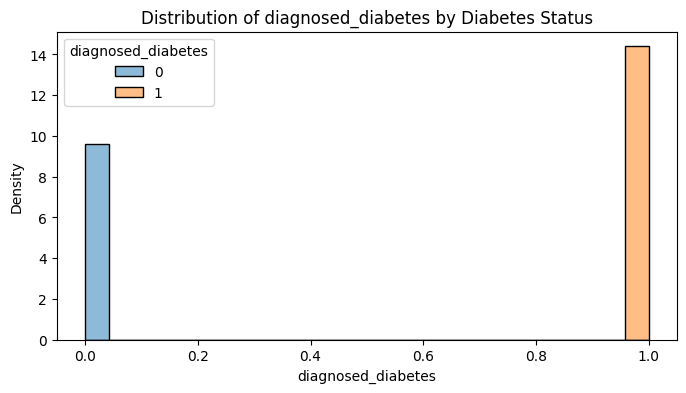

In [9]:
for col in data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, hue='diagnosed_diabetes', stat='density')
    plt.title(f'Distribution of {col} by Diabetes Status')
    plt.show()

<Axes: >

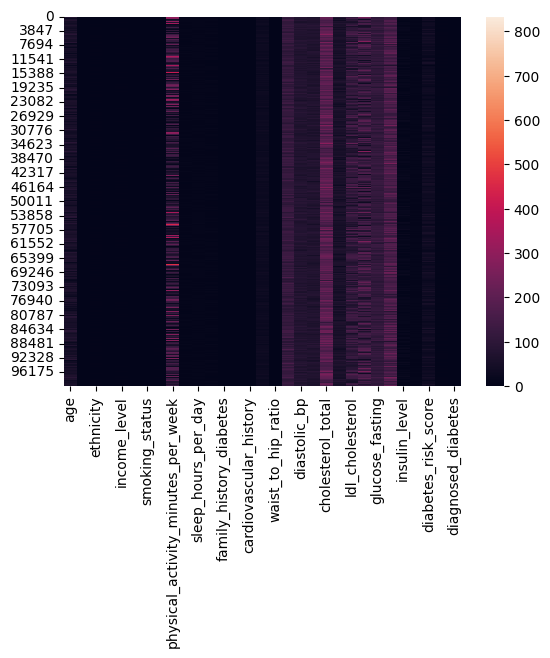

In [10]:
sns.heatmap(data_cat)